### Let's write an elementary tokenizer that uses words as tokens.

We will use Mark Twain's _Life On The Mississippi_ as a test bed. The text is in the accompanying file 'Life_On_The_Mississippi.txt'

Here's a not-terribly-good such tokenizer:

In [1]:
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('\ufeffThe', 1)
('Project', 79)
('Gutenberg', 22)
('eBook', 4)
('of', 4469)
('Life', 5)
('on', 856)
('the', 8443)
('Mississippi', 104)
('This', 127)
('ebook', 2)
('is', 1076)
('for', 1017)
('use', 34)
('anyone', 4)
('anywhere', 8)
('in', 2381)
('United', 36)
('States', 26)
('and', 5692)
('most', 119)
('other', 223)
('parts', 5)
('world', 40)
('at', 676)
('no', 325)
('cost', 18)
('with', 1053)
('almost', 37)
('restrictions', 2)
('whatsoever.', 2)
('You', 92)
('may', 85)
('copy', 12)
('it,', 199)
('give', 67)
('it', 1382)
('away', 107)
('or', 561)
('re-use', 2)
('under', 112)
('terms', 22)
('License', 8)
('included', 2)
('this', 591)
('online', 4)
('www.gutenberg.org.', 4)
('If', 85)
('you', 813)
('are', 361)
('not', 680)
('located', 9)
('States,', 8)
('will', 287)
('have', 557)
('to', 3518)
('check', 4)
('laws', 13)
('country', 50)
('where', 152)
('before', 150)
('using', 10)
('eBook.', 2)
('Title:', 1)
('Author:', 1)
('Mark', 2)
('Twain', 2)
('Release', 1)
('date:', 1)
('July', 7)
('1

This is unsatisfactory for a few reasons:

* There are non-ASCII (Unicode) characters that should be stripped (the so-called "Byte-Order Mark" or BOM \ufeff at the beginning of the text);

* There are punctuation marks, which we don't want to concern ourselves with;

* The same word can appear capitalized, or lower-case, or with its initial letter upper-cased, whereas we want them all to be normalized to lower-case.

Part 1 of this assignment: insert code in this loop to operate on the str variable 'line' so as to fix these problems before 'line' is split into words.

A hint to one possible way to do this: use the 'punctuation' character definition in the Python 'string' module, the 'maketrans' and 'translate' methods of Python's str class, to eliminate punctuation, and the regular expression ('re') Python module to eliminate any Unicode---it is useful to know that the regular expression r'[^\x00-x7f]' means "any character not in the vanilla ASCII set.

Part 2: Add code to sort the contents of wdict by word occurrence frequency.  What are the top 100 most frequent word tokens?  Adding up occurrence frequencies starting from the most frequent words, how many distinct words make up the top 90% of word occurrences in this "corpus"?

For this part, the docs of Python's 'sorted' and of the helper 'itemgetter' from 'operator' reward study.

Write your modified code in the cell below.

# **1. Tokenization**

## Homework part 1

In [6]:
wdict = {}

import re
import string
ttable = str.maketrans("", "", string.punctuation)
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:
        line = line.translate(ttable)
        line = re.sub(r'[^\x00-\x7f]', r'', line)
        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break

('The', 761)
('Project', 84)
('Gutenberg', 83)
('eBook', 9)
('of', 4493)
('Life', 5)
('on', 914)
('the', 8465)
('Mississippi', 154)
('This', 139)
('ebook', 2)
('is', 1138)
('for', 1046)
('use', 45)
('anyone', 5)
('anywhere', 18)
('in', 2443)
('United', 36)
('States', 44)
('and', 5730)
('most', 120)
('other', 262)
('parts', 8)
('world', 66)
('at', 688)
('no', 347)
('cost', 24)
('with', 1071)
('almost', 38)
('restrictions', 2)
('whatsoever', 2)
('You', 111)
('may', 87)
('copy', 17)
('it', 1932)
('give', 71)
('away', 170)
('or', 573)
('reuse', 2)
('under', 114)
('terms', 24)
('License', 10)
('included', 3)
('this', 639)
('online', 4)
('wwwgutenbergorg', 5)
('If', 93)
('you', 916)
('are', 377)
('not', 697)
('located', 9)
('will', 297)
('have', 566)
('to', 3565)
('check', 4)
('laws', 16)
('country', 76)
('where', 160)
('before', 201)
('using', 11)
('Title', 1)
('Author', 1)
('Mark', 12)
('Twain', 5)
('Release', 1)
('date', 18)
('July', 7)
('10', 10)
('2004', 1)
('245', 1)
('Most', 4)
('rece

## Homework part 2

In [9]:
from operator import itemgetter

witems = wdict.items()


witems = sorted(witems, key=itemgetter(1), reverse=True)

for item in list(witems)[:100]:
    print (item) #top 100 most frequent word tokens

('the', 8465)
('and', 5730)
('of', 4493)
('a', 3850)
('to', 3565)
('in', 2443)
('was', 2089)
('I', 2080)
('it', 1932)
('that', 1669)
('is', 1138)
('with', 1071)
('he', 1067)
('for', 1046)
('had', 959)
('his', 928)
('you', 916)
('on', 914)
('as', 822)
('The', 761)
('but', 752)
('not', 697)
('at', 688)
('by', 662)
('all', 649)
('this', 639)
('were', 624)
('they', 618)
('be', 614)
('one', 598)
('or', 573)
('have', 566)
('from', 560)
('out', 537)
('my', 530)
('up', 526)
('him', 522)
('me', 516)
('there', 505)
('would', 476)
('which', 474)
('so', 472)
('them', 425)
('an', 415)
('said', 396)
('river', 382)
('are', 377)
('when', 374)
('their', 367)
('we', 365)
('It', 357)
('no', 347)
('He', 335)
('been', 332)
('about', 331)
('time', 331)
('down', 323)
('then', 312)
('could', 311)
('has', 304)
('now', 302)
('into', 299)
('will', 297)
('its', 292)
('if', 287)
('her', 273)
('other', 262)
('man', 253)
('two', 253)
('do', 244)
('some', 243)
('got', 232)
('any', 232)
('water', 220)
('more', 219)
('

# 2. **Embedding**

Modify the embedding visualization code above to zoom in on various regions of the projections, and identify at least one interesting cluster of tokens.

In [10]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()
# This notebook assumes CPU execution. If you want to use GPUs, put the model on cuda and modify subsequent code blocks.
#model.to('cuda')
# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Save the BERT vocabulary to a file -- by default it will name this file "vocab.txt".
tokenizer.save_vocabulary(save_directory='.')

print("The vocabulary size is: ", model.config.vocab_size) # Size of the vocabulary


2024-04-09 05:12:41.430377: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/soft/datascience/conda/2023-01-10/mconda3/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
Some weights of the model checkpoint at bert-large-uncased-whole-word-masking were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_rel

The vocabulary size is:  30522


In [11]:
# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)


(30522, 1024)


In [12]:
# Read in the vocabulary
filename = "vocab.txt"
with open(filename,'r') as f:
    bertwords = np.array([])
    for line in f:
        bertwords = np.append(bertwords, line.rstrip())

# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
bert_char_indices_to_use = np.arange(999, 1063, 1)
bert_voc_indices_to_plot = np.append(bert_char_indices_to_use, np.arange(1996, 5932, 1))
bert_voc_indices_to_use = np.append(bert_char_indices_to_use, np.arange(1996, 11932, 1))

bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_use)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]


print(len(bert_voc_indices_to_plot))
print(len(bert_voc_indices_to_use))

4000
10000


In [13]:
# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=12,verbose=2,metric='cosine',init='pca',n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 1.363s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.267747
[t-SNE] Computed conditional probabilities in 0.181s
[t-SNE] Iteration 50: error = 97.8528748, gradient norm = 0.0066888 (50 iterations in 0.612s)
[t-SNE] It

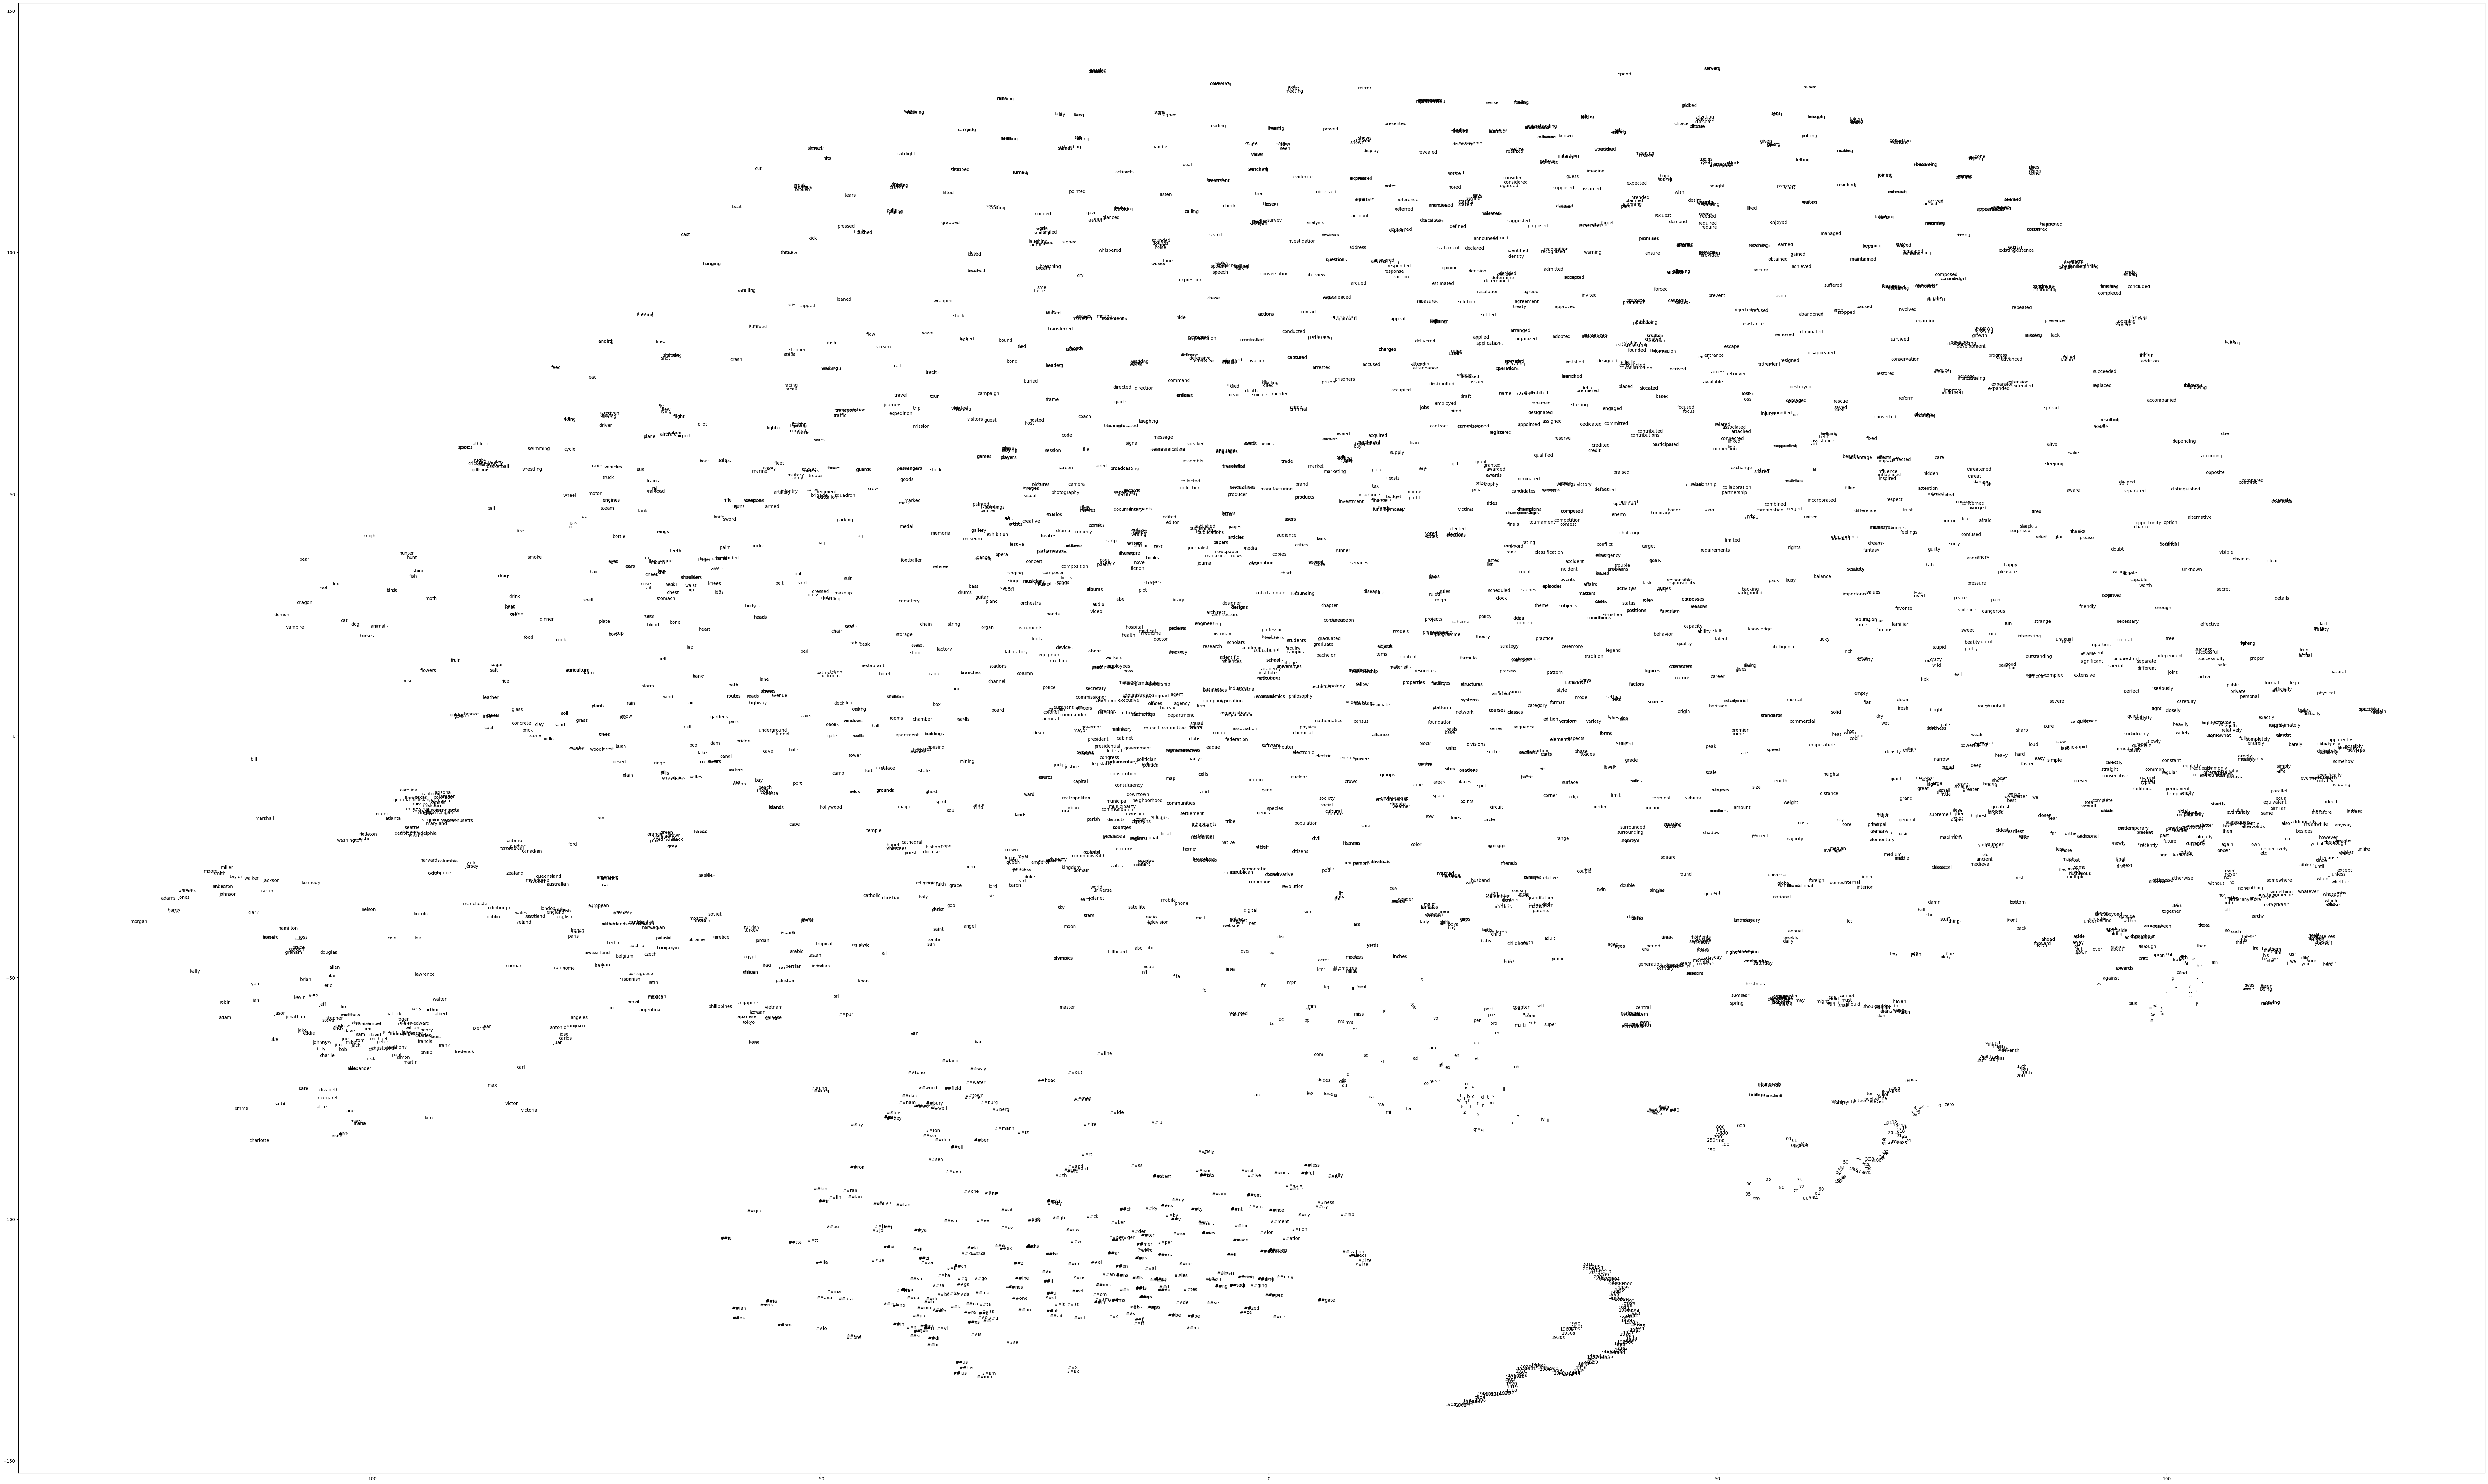

In [16]:
# Plot the transformed BERT vocabulary embeddings:
fig = plt.figure()
for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
    currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
plt.show()

Place Names


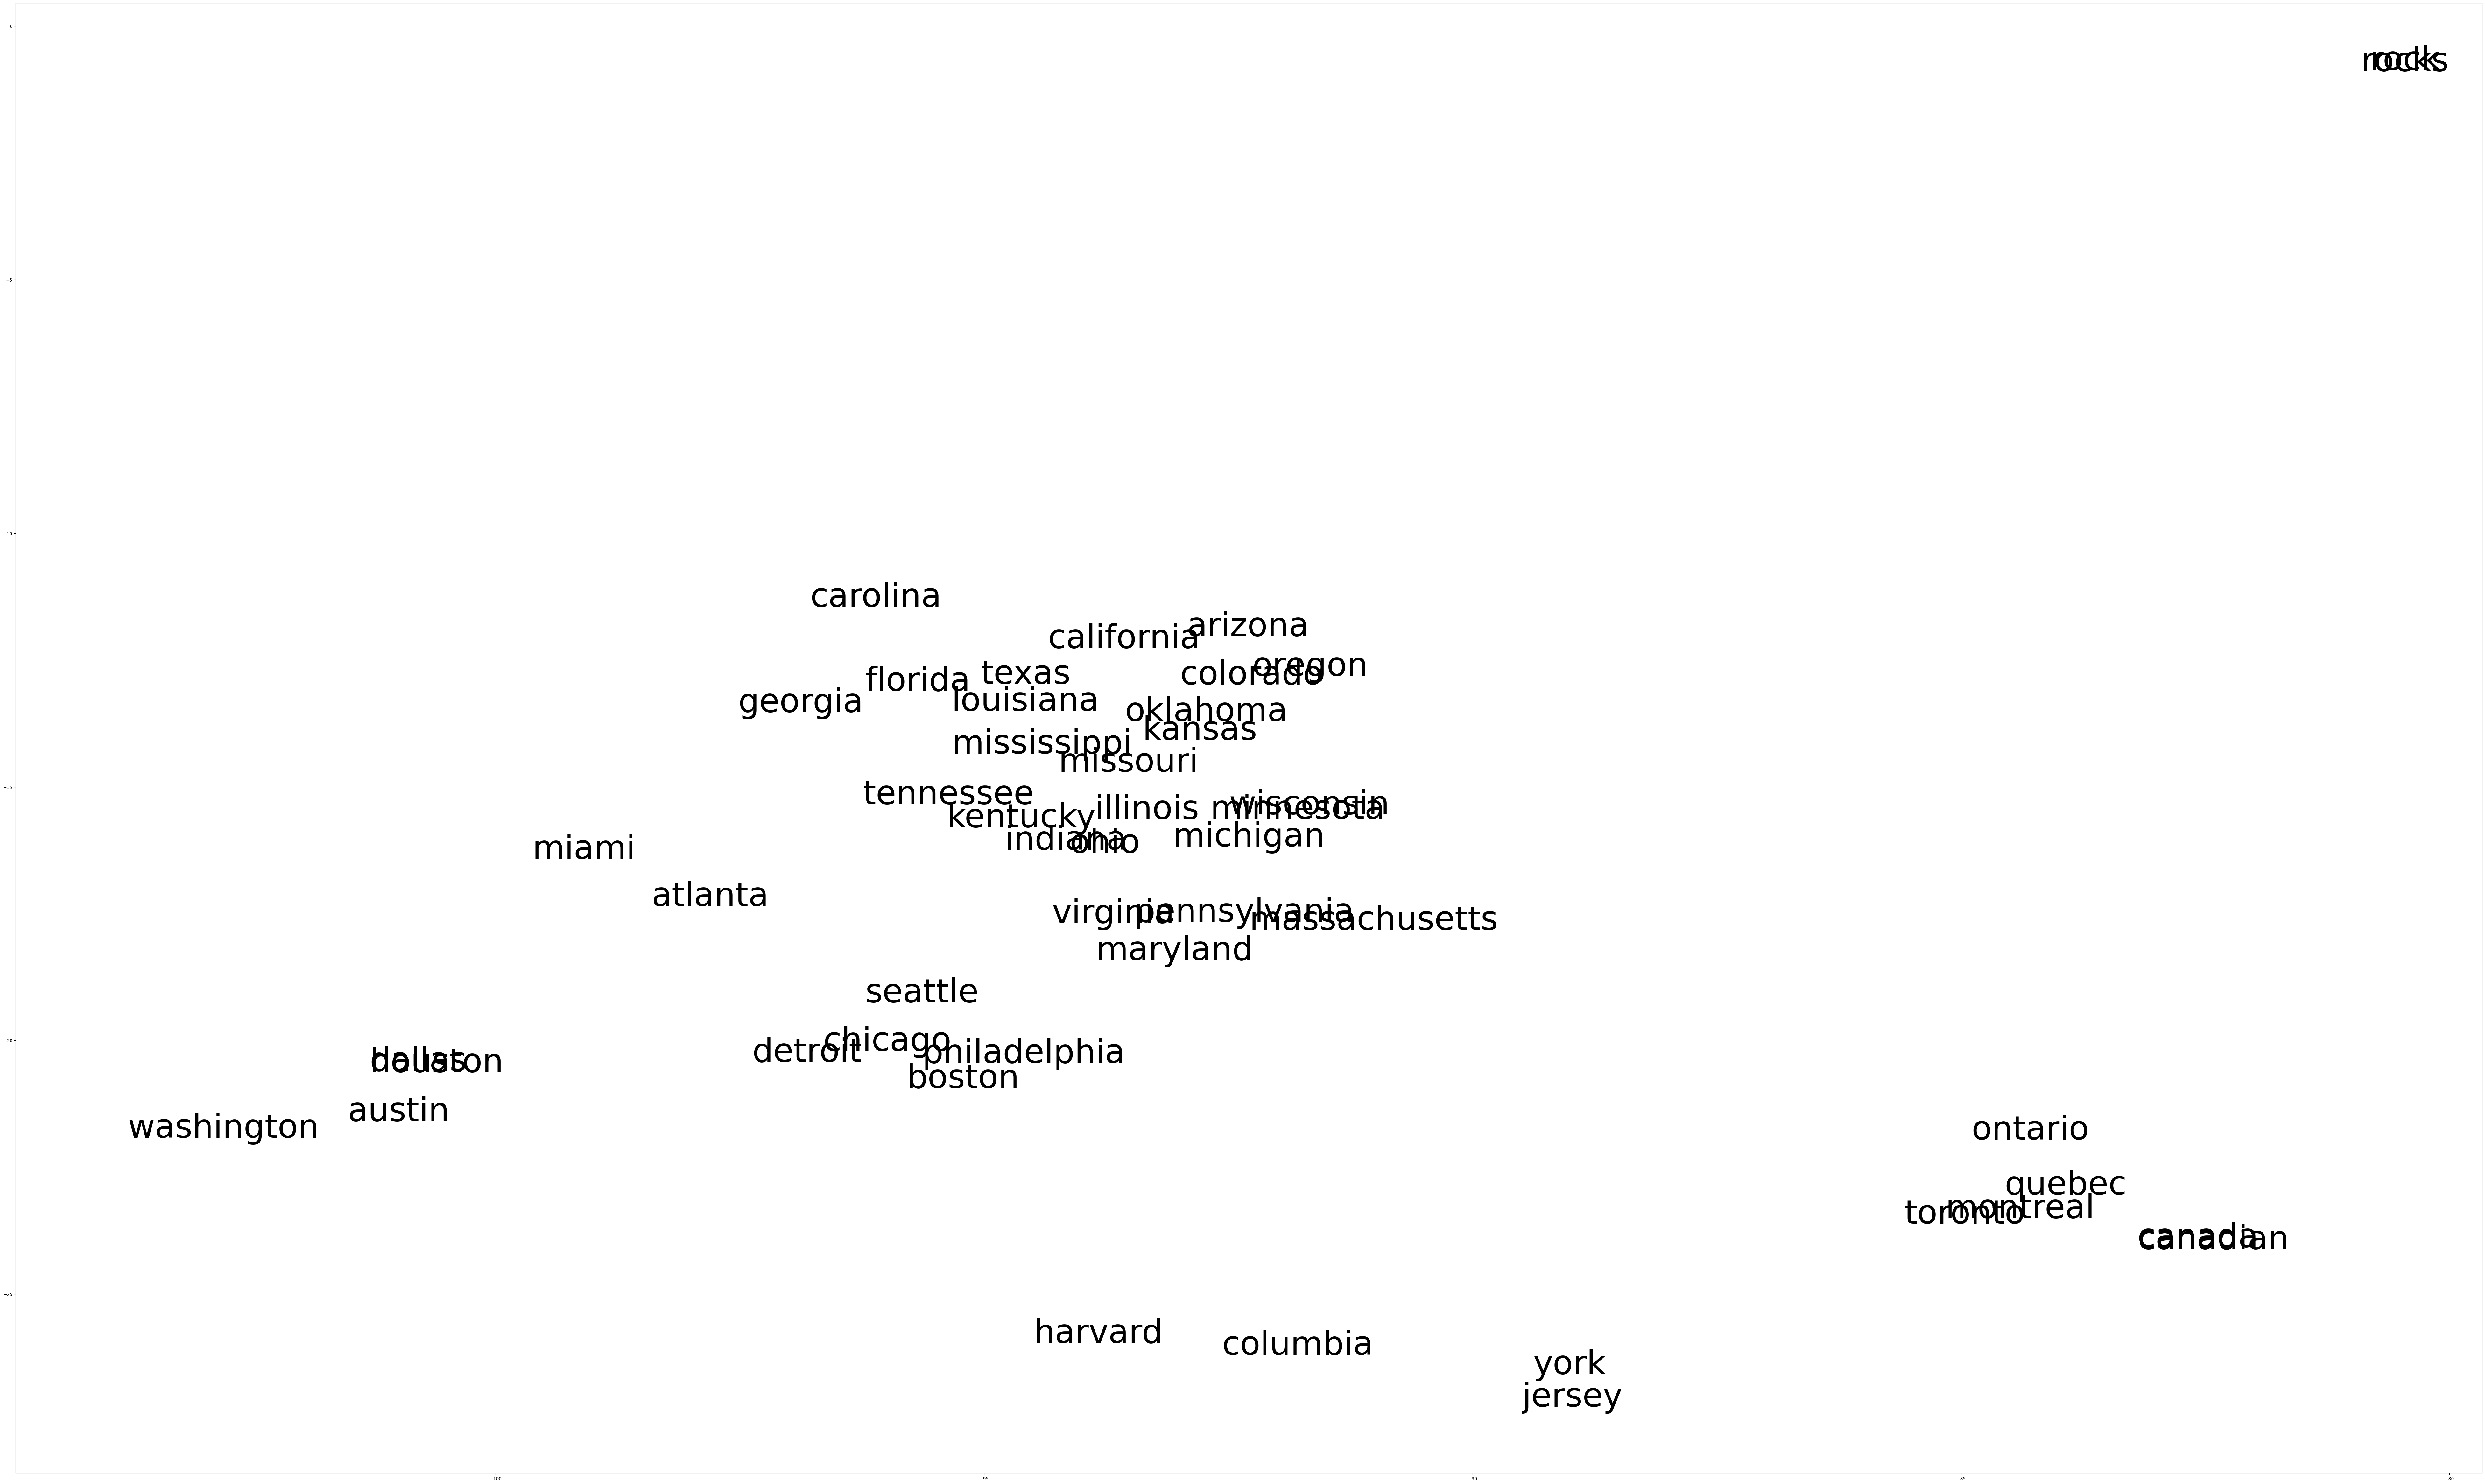

Time relations


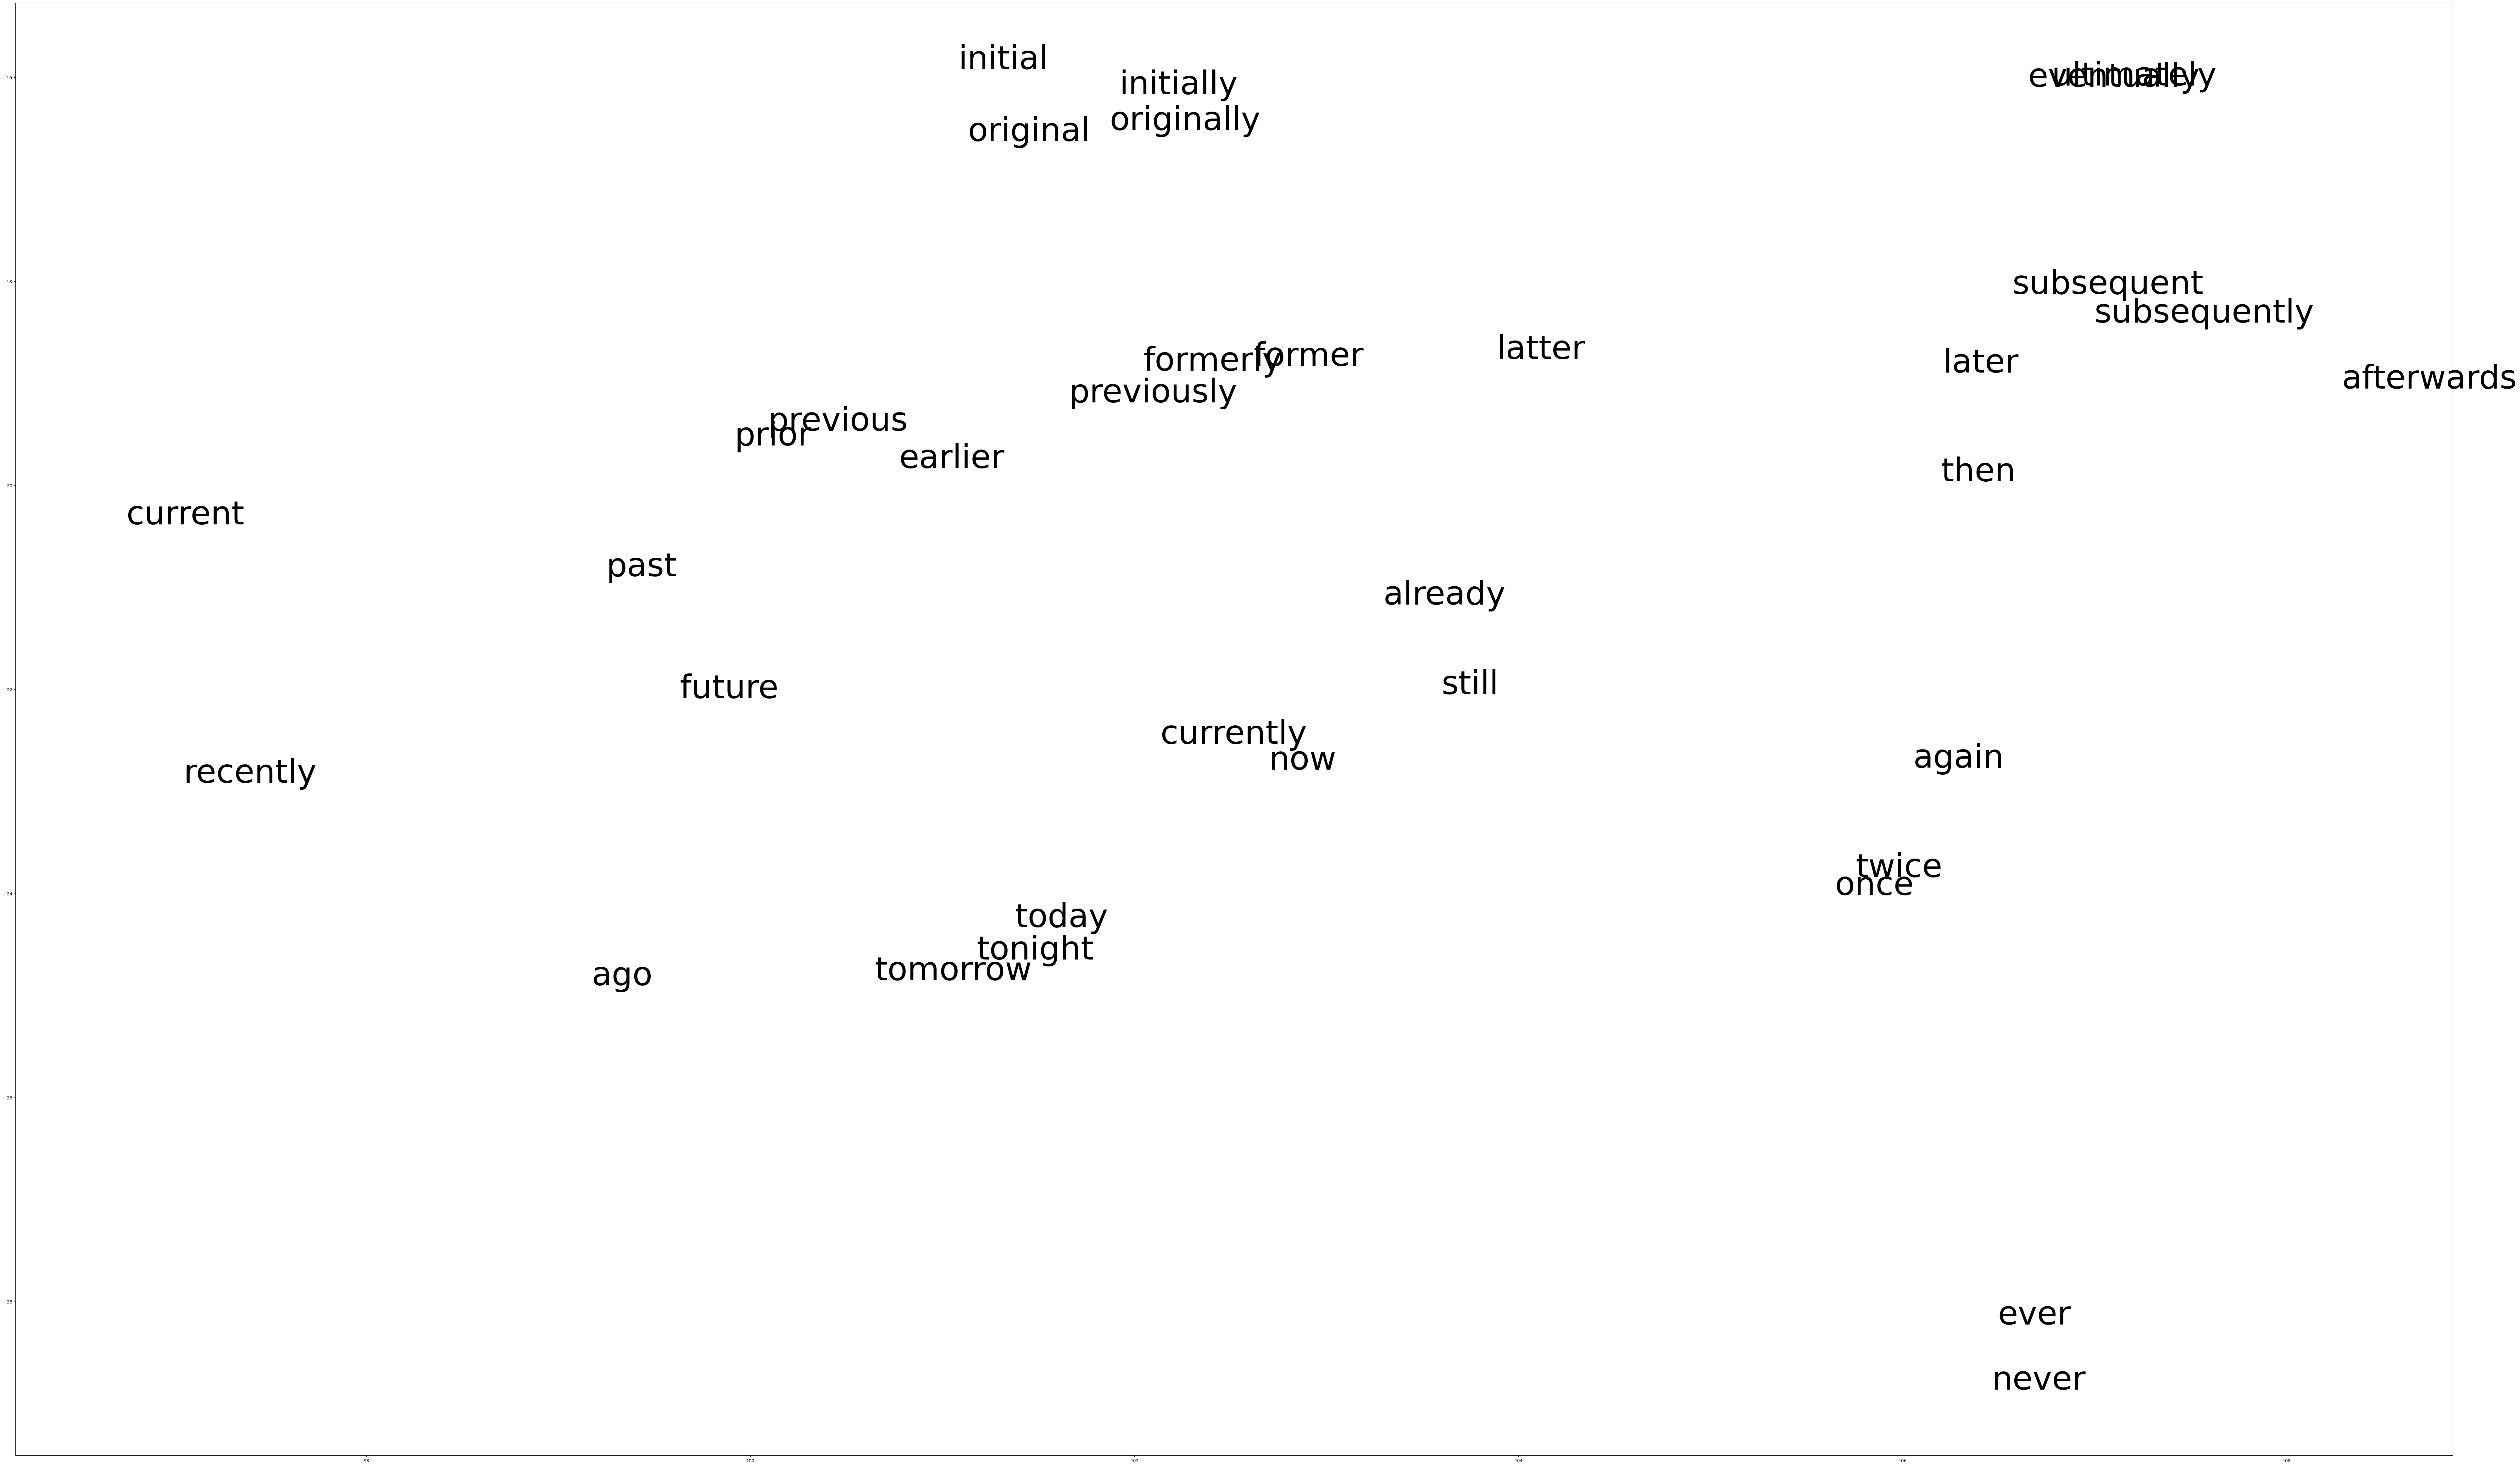

In [17]:
nplotted = len(bert_words_to_plot)

# Get the limits of the embedding region
x_left = np.min(bert_word_embs_to_use_tsne[:nplotted,0])
x_right = np.max(bert_word_embs_to_use_tsne[:nplotted,0])
y_left = np.min(bert_word_embs_to_use_tsne[:nplotted,1])
y_right = np.max(bert_word_embs_to_use_tsne[:nplotted,1])

# Width of embedding region
xwidth = x_right - x_left ; ywidth = y_right - y_left


def plotwindow(window_xfrac, window_yfrac, window_xoff, window_yoff):
    """
    Plot a requested window on the embedding.

    window_xfrac (float): Fraction of the X-window size to plot
    window_yfrac (float): Fraction of the Y-window size to plot
    window_xoff (float): X-offset of window center, from the left. Should be in [0.0, 1.0],
        and is interpreted as a fraction of the window X-width
    window_yoff (float): Y-offset of window center, from the bottom. Should be in [0.0, 1.0],
        and is interpreted as a fraction of the window Y-width
    
    """

    ## Bounds on window coordinates
    newxl_center = x_left + xwidth * window_xoff
    newxl_left = newxl_center - 0.5*window_xfrac * xwidth
    newxl_right =  newxl_center + 0.5*window_xfrac * xwidth

    newyl_center = y_left + ywidth * window_yoff
    newyl_left = newyl_center - 0.5*window_yfrac * ywidth
    newyl_right =  newyl_center + 0.5*window_yfrac * ywidth

    # Make arrays including only words inside the requested window, using numpy
    # logical indexing
    nplotted = len(bert_words_to_plot)
    x_inds_r = bert_word_embs_to_use_tsne[:nplotted,0] < newxl_right 
    x_inds_l = bert_word_embs_to_use_tsne[:nplotted,0] > newxl_left
    x_inds = np.logical_and(x_inds_l, x_inds_r)

    y_inds_r = bert_word_embs_to_use_tsne[:nplotted,1] < newyl_right
    y_inds_l = bert_word_embs_to_use_tsne[:nplotted,1] > newyl_left
    y_inds = np.logical_and(y_inds_l, y_inds_r)

    inds = np.logical_and(x_inds, y_inds)

    # Index the word and embedding arrays by the window-restricted indices
    bwtp = bert_words_to_plot[inds]
    bwembs = bert_word_embs_to_use_tsne[:nplotted,:][inds,:]

    # Plot away
    for i, txt in enumerate(bwtp):
        plt.scatter(bwembs[i,0], bwembs[i,1], s=0)
        plt.text(bwembs[i,0], bwembs[i,1], txt, family='sans-serif', size=75)

    plt.show()

window_xfrac = 0.1 ; window_yfrac = 0.1
window_xoff = 0.14 ; window_yoff = 0.45  ## Place names
print("Place Names")
plotwindow(window_xfrac, window_yfrac, window_xoff, window_yoff)

window_xfrac = 0.05 ; window_yfrac = 0.05
window_xoff = 0.92 ; window_yoff = 0.42  ## Time relations
print("Time relations")
plotwindow(window_xfrac, window_yfrac, window_xoff, window_yoff)
